In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_distribution

from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.primitives import StatevectorSampler

import matplotlib.pyplot as plt

In [2]:
pm = generate_preset_pass_manager(optimization_level=1)
sampler = StatevectorSampler()

In [3]:
def deutsch_algorithm(oracle):
    """
    Implements Deutsch's algorithm using the given oracle.
    
    Parameters:
    oracle (QuantumCircuit): A quantum circuit implementing the oracle function f(x).
    
    Returns:
    str: 'constant' if f(x) is constant, 'balanced' if f(x) is balanced.
    """

    qubit_x = QuantumRegister(1, name='qubit_x') 
    qubit_y = QuantumRegister(1, name='qubit_y')

    measure_x = ClassicalRegister(1, name='measure_x')
    measure_Fx = ClassicalRegister(1, name='measure_Fx')

    # Create a 2-qubit quantum circuit
    qc = QuantumCircuit(qubit_x, qubit_y, measure_x, measure_Fx)
    # qc = QuantumCircuit(qubit_x, qubit_y, measure_x)
    
    # Initialize the qubits
    qc.x(1)  # Apply X gate to the second qubit
    qc.barrier()
    
    qc.h([0, 1])  # Apply Hadamard gate to both qubits
    
    # Apply the oracle
    qc.append(oracle.to_gate(), [0, 1])
    
    # Apply Hadamard to the first qubit again
    qc.h(0)
    
    # Measure the first qubit
    qc.barrier()
    qc.measure(qubit_x, measure_x)
    qc.measure(qubit_y, measure_Fx)

    display(qc.draw('mpl'))

    isa_circuit = pm.run(qc)
    job = sampler.run([isa_circuit])  # Ejecución de un circuito con Sampler
    pub_result = job.result()[0]

    data_pub = pub_result.data  # Acceso a los datos del resultado para PUB 0

    countsa = data_pub.measure_x.get_counts()  # Conteo de medidas almacenadas en el registro clásico "medida"

    bitscountsa = data_pub.measure_x.get_bitstrings()  # Conteo de medidas almacenadas en el registro clásico "medida"
    print(bitscountsa)

    countsb = data_pub.measure_Fx.get_counts()  # Conteo de medidas almacenadas en el registro clásico "medida"

    counts = countsa + countsb

    # display(plot_distribution(countsa+countsb))


    # Determine if f(x) is constant or balanced
    return 'constant' if '0' in countsa and countsa['0'] > countsa.get('1', 0) else 'balanced'

In [4]:
# Define oracle functions

def constant_oracle():
    """ Creates a quantum oracle for a constant function f(x) = 0. """
    oracle = QuantumCircuit(2, name="  f(x) = 0  ")
    return oracle

def balanced_oracle():
    """ Creates a quantum oracle for a balanced function f(x) = x. """
    oracle = QuantumCircuit(2, name="  f(x) = x  ")
    oracle.cx(0, 1)
    return oracle

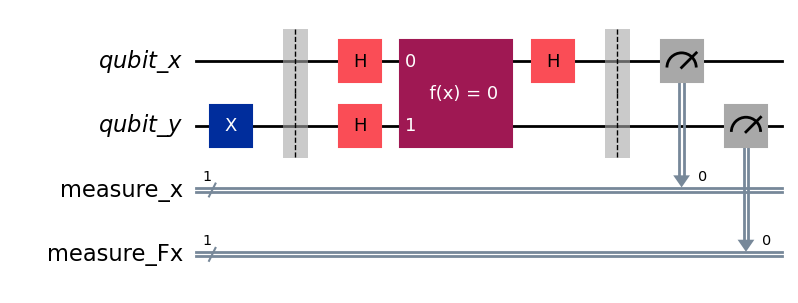

['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',

TypeError: unsupported operand type(s) for +: 'dict' and 'dict'

In [5]:
# Test the algorithm
print("Testing constant oracle:", deutsch_algorithm(constant_oracle()))
print("Testing balanced oracle:", deutsch_algorithm(balanced_oracle()))